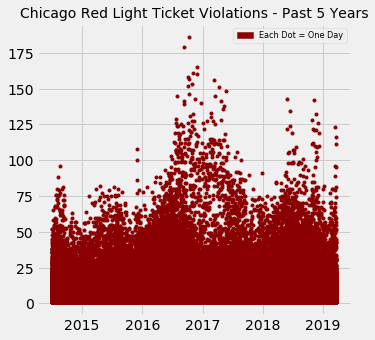

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

file_path = 'Red_Light_Camera_Violations.csv'
df = pd.read_csv(file_path, delimiter=",", index_col=None, encoding = "ISO-8859-1")
df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'], infer_datetime_format=True)
values = df['VIOLATIONS']
dates = list(df['VIOLATION DATE'])

plt.style.use('fivethirtyeight')
years = mdates.YearLocator()
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.xaxis.set_major_locator(years)
red_patch = mpatches.Patch(color='DarkRed', label='Each Dot = One Day')
plt.legend(handles=[red_patch], fontsize = 'xx-small')

plt.rcParams.update({'font.size': 12})
plt.plot_date(dates, values, color='DarkRed', markersize=3) #linestyle='solid'
plt.xticks(rotation=0)
plt.title('Chicago Red Light Ticket Violations - Past 5 Years', fontsize=14)
plt.savefig('Chicago traffic Violations By Year.png', bbox_inches='tight')

(457411, 10)


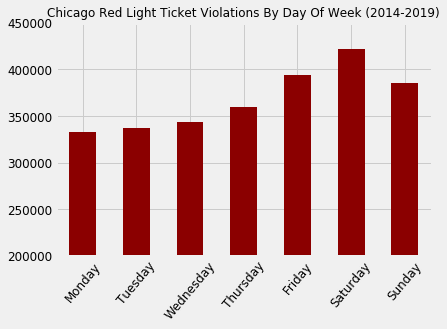

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

file_path = 'Red_Light_Camera_Violations.csv'
df = pd.read_csv(file_path, delimiter=",", index_col=None, encoding = "ISO-8859-1")
df = df.sort_values(by=['VIOLATION DATE'], ascending=True)
print(df.shape)

df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'], infer_datetime_format=True)
df['Day'] = df['VIOLATION DATE'].dt.day
s1 = pd.Series(df['VIOLATION DATE'])
df['DayName'] = s1.dt.day_name()

totals = list()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in day_names:
    new_df = df[df['DayName']==day]
    violations = sum(new_df['VIOLATIONS'])
    totals.append(violations)
    
df2 = pd.DataFrame(totals, index=day_names) 
df2.plot(kind="bar", color='DarkRed', legend=False, rot=50, sort_columns=False)
plt.ylim(200000, 450000)
plt.title('Chicago Red Light Ticket Violations By Day Of Week (2014-2019)', fontsize=12)
plt.savefig('Chicago Red Light Violations By Day OF Week.png', bbox_inches='tight')

(457411, 10)


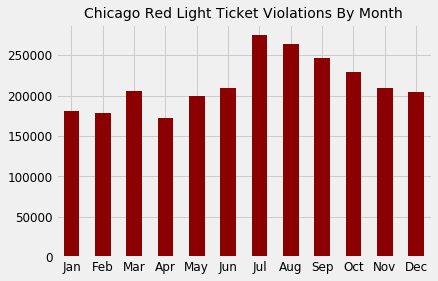

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

file_path = 'Red_Light_Camera_Violations.csv'
df = pd.read_csv(file_path, delimiter=",", index_col=None, encoding = "ISO-8859-1")
df = df.sort_values(by=['VIOLATION DATE'], ascending=True)
print(df.shape)

df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'], infer_datetime_format=True)
df['Month'] = df['VIOLATION DATE'].dt.month
months = pd.unique(df['Month'])
month_names = [calendar.month_abbr[month] for month in months]
month_names = pd.unique(month_names)
totals = list()
for month in months:
    new_df = df[df['Month']==month]
    violations = sum(new_df['VIOLATIONS'])
    totals.append(violations)

df = pd.DataFrame(totals, index=month_names)
df.plot(xticks=months, kind="bar", color='DarkRed', legend=False, rot=0)
plt.title('Chicago Red Light Ticket Violations By Month', fontsize=14)
plt.savefig('Chicago Red Light Violations By Month - Last 4 Years.png', bbox_inches='tight')


(457411, 10)


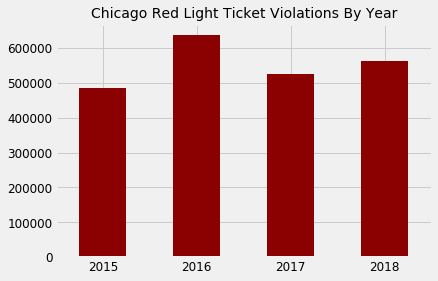

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

file_path = 'Red_Light_Camera_Violations.csv'
df = pd.read_csv(file_path, delimiter=",", index_col=None, encoding = "ISO-8859-1")
df = df.sort_values(by=['VIOLATION DATE'], ascending=True)
print(df.shape)

df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'], infer_datetime_format=True)
df['Year'] = df['VIOLATION DATE'].dt.year
df = df[(df['Year']>2014) & (df['Year']<2019)]
years = [2015,2016,2017,2018]
totals = list()
for year in years:
    new_df = df[df['Year']==year]
    violations = sum(new_df['VIOLATIONS'])
    totals.append(violations)

df = pd.DataFrame(totals, index=years)
df.plot(kind="bar", color='DarkRed', legend=False, rot=0)
plt.title('Chicago Red Light Ticket Violations By Year', fontsize=14)
plt.savefig('Chicago Red Light Violations By Year.png', bbox_inches='tight')
